In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping

In [2]:
filepath = '../data/processed/processed_data.csv'
df = pd.read_csv(filepath)

In [3]:
df.head(3)

,Amount(in rupees),Price (in rupees),Carpet Area,Bathroom,Balcony,Super Area,Current_Floor,Total_Floors,Floor_Ratio,Transaction_Other,...,"overlooking_Pool, Main Road","overlooking_Pool, Main Road, Garden/Park","overlooking_Pool, Main Road, Not Available",Ownership_Freehold,Ownership_Leasehold,Ownership_Power Of Attorney,location_freq,Society_freq,Car_Parking_freq,Price_log
0,-0.196926,6000.0,-0.295263,-1.640163,-0.001599,-0.072239,1.219708,0.320028,1.374794,-0.061604,...,-0.078068,-0.005656,-0.002309,0.234628,-0.170292,-0.075717,-1.358704,-1.194688,0.876342,8.699681
1,-0.051160,13799.0,-0.307042,-0.490266,-0.001599,-0.072239,-0.348577,1.782507,-1.653879,-0.061604,...,-0.078068,-0.005656,-0.002309,0.234628,-0.170292,-0.075717,-1.358704,-1.194688,-1.462531,9.532424
2,0.058166,17500.0,-0.173542,-0.490266,-0.001599,-0.072239,1.219708,2.713175,-0.836813,-0.061604,...,-0.078068,-0.005656,-0.002309,0.234628,-0.170292,-0.075717,-1.358704,-1.194595,-0.706103,9.770013


In [4]:
# Drop columns
df = df.drop(columns=['Amount(in rupees)', 'Price (in rupees)'])

In [5]:
# Define features and target
X = df.drop(columns=['Price_log'])
y = df['Price_log']

In [6]:
X.shape

(187531, 44)

In [7]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
# Output the shapes of the resulting datasets
(X_train.shape, X_val.shape, X_test.shape), (y_train.shape, y_val.shape, y_test.shape)

(((131271, 44), (28130, 44), (28130, 44)), ((131271,), (28130,), (28130,)))

## Training an ANN & Evaluation

In [9]:
model = Sequential() # Define the model
model.add(Input(shape=(44,))) # Set up the input dimension

model.add(Dense(64, activation='relu')) # Input Layer
model.add(Dense(128, activation='relu')) # Hidden Layer
model.add(Dropout(0.3)) # Dropout layer to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/100
4103/4103 - 5s - loss: 1.8221 - val_loss: 2.4055 - 5s/epoch - 1ms/step
Epoch 2/100
4103/4103 - 4s - loss: 0.1941 - val_loss: 0.3325 - 4s/epoch - 1ms/step
Epoch 3/100
4103/4103 - 4s - loss: 0.1103 - val_loss: 0.1323 - 4s/epoch - 1ms/step
Epoch 4/100
4103/4103 - 4s - loss: 0.0919 - val_loss: 0.1223 - 4s/epoch - 1ms/step
Epoch 5/100
4103/4103 - 4s - loss: 0.0790 - val_loss: 0.0906 - 4s/epoch - 1ms/step
Epoch 6/100
4103/4103 - 4s - loss: 0.0747 - val_loss: 0.0881 - 4s/epoch - 1ms/step
Epoch 7/100
4103/4103 - 4s - loss: 0.0732 - val_loss: 0.0834 - 4s/epoch - 1ms/step
Epoch 8/100
4103/4103 - 4s - loss: 0.0750 - val_loss: 0.0763 - 4s/epoch - 1ms/step
Epoch 9/100
4103/4103 - 4s - loss: 0.0720 - val_loss: 0.0794 - 4s/epoch - 1ms/step
Epoch 10/100
4103/4103 - 4s - loss: 0.0678 - val_loss: 0.0794 - 4s/epoch - 1ms/step
Epoch 11/100
4103/4103 - 4s - loss: 0.0670 - val_loss: 0.0875 - 4s/epoch - 1ms/step
Epoch 12/100
4103/4103 - 4s - loss: 0.0661 - val_loss: 0.0693 - 4s/epoch - 1ms/step
E

In [10]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")

880/880 - 1s - loss: 0.0585 - 522ms/epoch - 593us/step
Test Loss: 0.058492422103881836


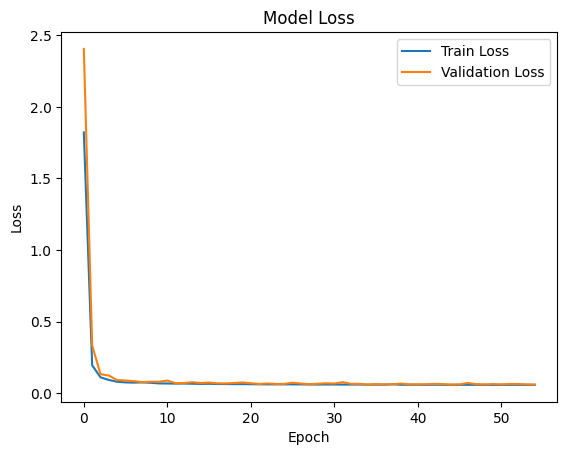

In [11]:
# Ploting the Learning Curves
# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [12]:
# Predict on the test set
y_pred = model.predict(X_test)

880/880 [==============================] - 1s 598us/step


In [13]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R Squared: {r2}")

Mean Absolute Error: 0.13674871605001773
Mean Squared Error: 0.058492446070058754
R Squared: 0.7559778068346733


In [19]:
# Save the entire model
model.save('../models/house_price_prediction_model.keras')

In [20]:
# Save only weights
model.save_weights('../models/house_price_prediction_weights.keras')